In [1]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import floatpy.readers.padeops_reader as por
import statistics as stats
import ipyvolume.pylab as ipv

fs = 12

directory = "/projects/ShockInducedMix/ShearLayerData/production/Mc07/rr8/256x384x128"
filename_prefix = directory+'/shearlayer_'
reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(False,False,True))
Nx,Ny,Nz,Lx,Ly,Lz,dx,dy,dz,kx,kz = stats.domain(reader,verbose=1)
steps = sorted(reader.steps)

print("Max steps: {}".format(max(steps)))

ImportError: No module named statistics

In [49]:
def iso_surf(reader,step,qname,level):
    reader.step = step
    q = reader.readData(qname)
    data = np.squeeze(np.array(q))
    print("Time: {}".format(reader.time))
    print("Min and max values: {},{}".format(np.amax(data),np.amin(data)) )
    
    ipv.figure(key=None, width=500, height=300, lighting=True)
    m = ipv.plot_isosurface(data, level=level, color='#8cd1c0', wireframe=False, 
                            surface=True, controls=True, extent=None)
    ipv.xlim(0, Nx)
    ipv.ylim(0, Ny)
    ipv.zlim(0, Nz)
    #ipv.xlabel('x')
    #ipv.ylabel('y')
    #ipv.zlabel('z')
    ipv.style.box_off()
    #ipv.style.axes_off()

    ipv.view(azimuth=45, elevation=45)
    ipv.show()

   

step = 10
savename = directory+"/img/iso_qname_%04d.png"%step
iso_surf(reader,step,'rho',0.93)

Time: 1000.0
Min and max values: 1.27449393272,0.497433871031


VkJveChjaGlsZHJlbj0oRmlndXJlKGNhbWVyYT1QZXJzcGVjdGl2ZUNhbWVyYShmb3Y9NDYuMCwgcG9zaXRpb249KDEuMCwgMS40MTQyMTM1NjIzNzMwOTUsIDEuMDAwMDAwMDAwMDAwMDAwMinigKY=


Min and max values of pdil: 0.01637900691,5.087178932e-10
Time: 1000.0


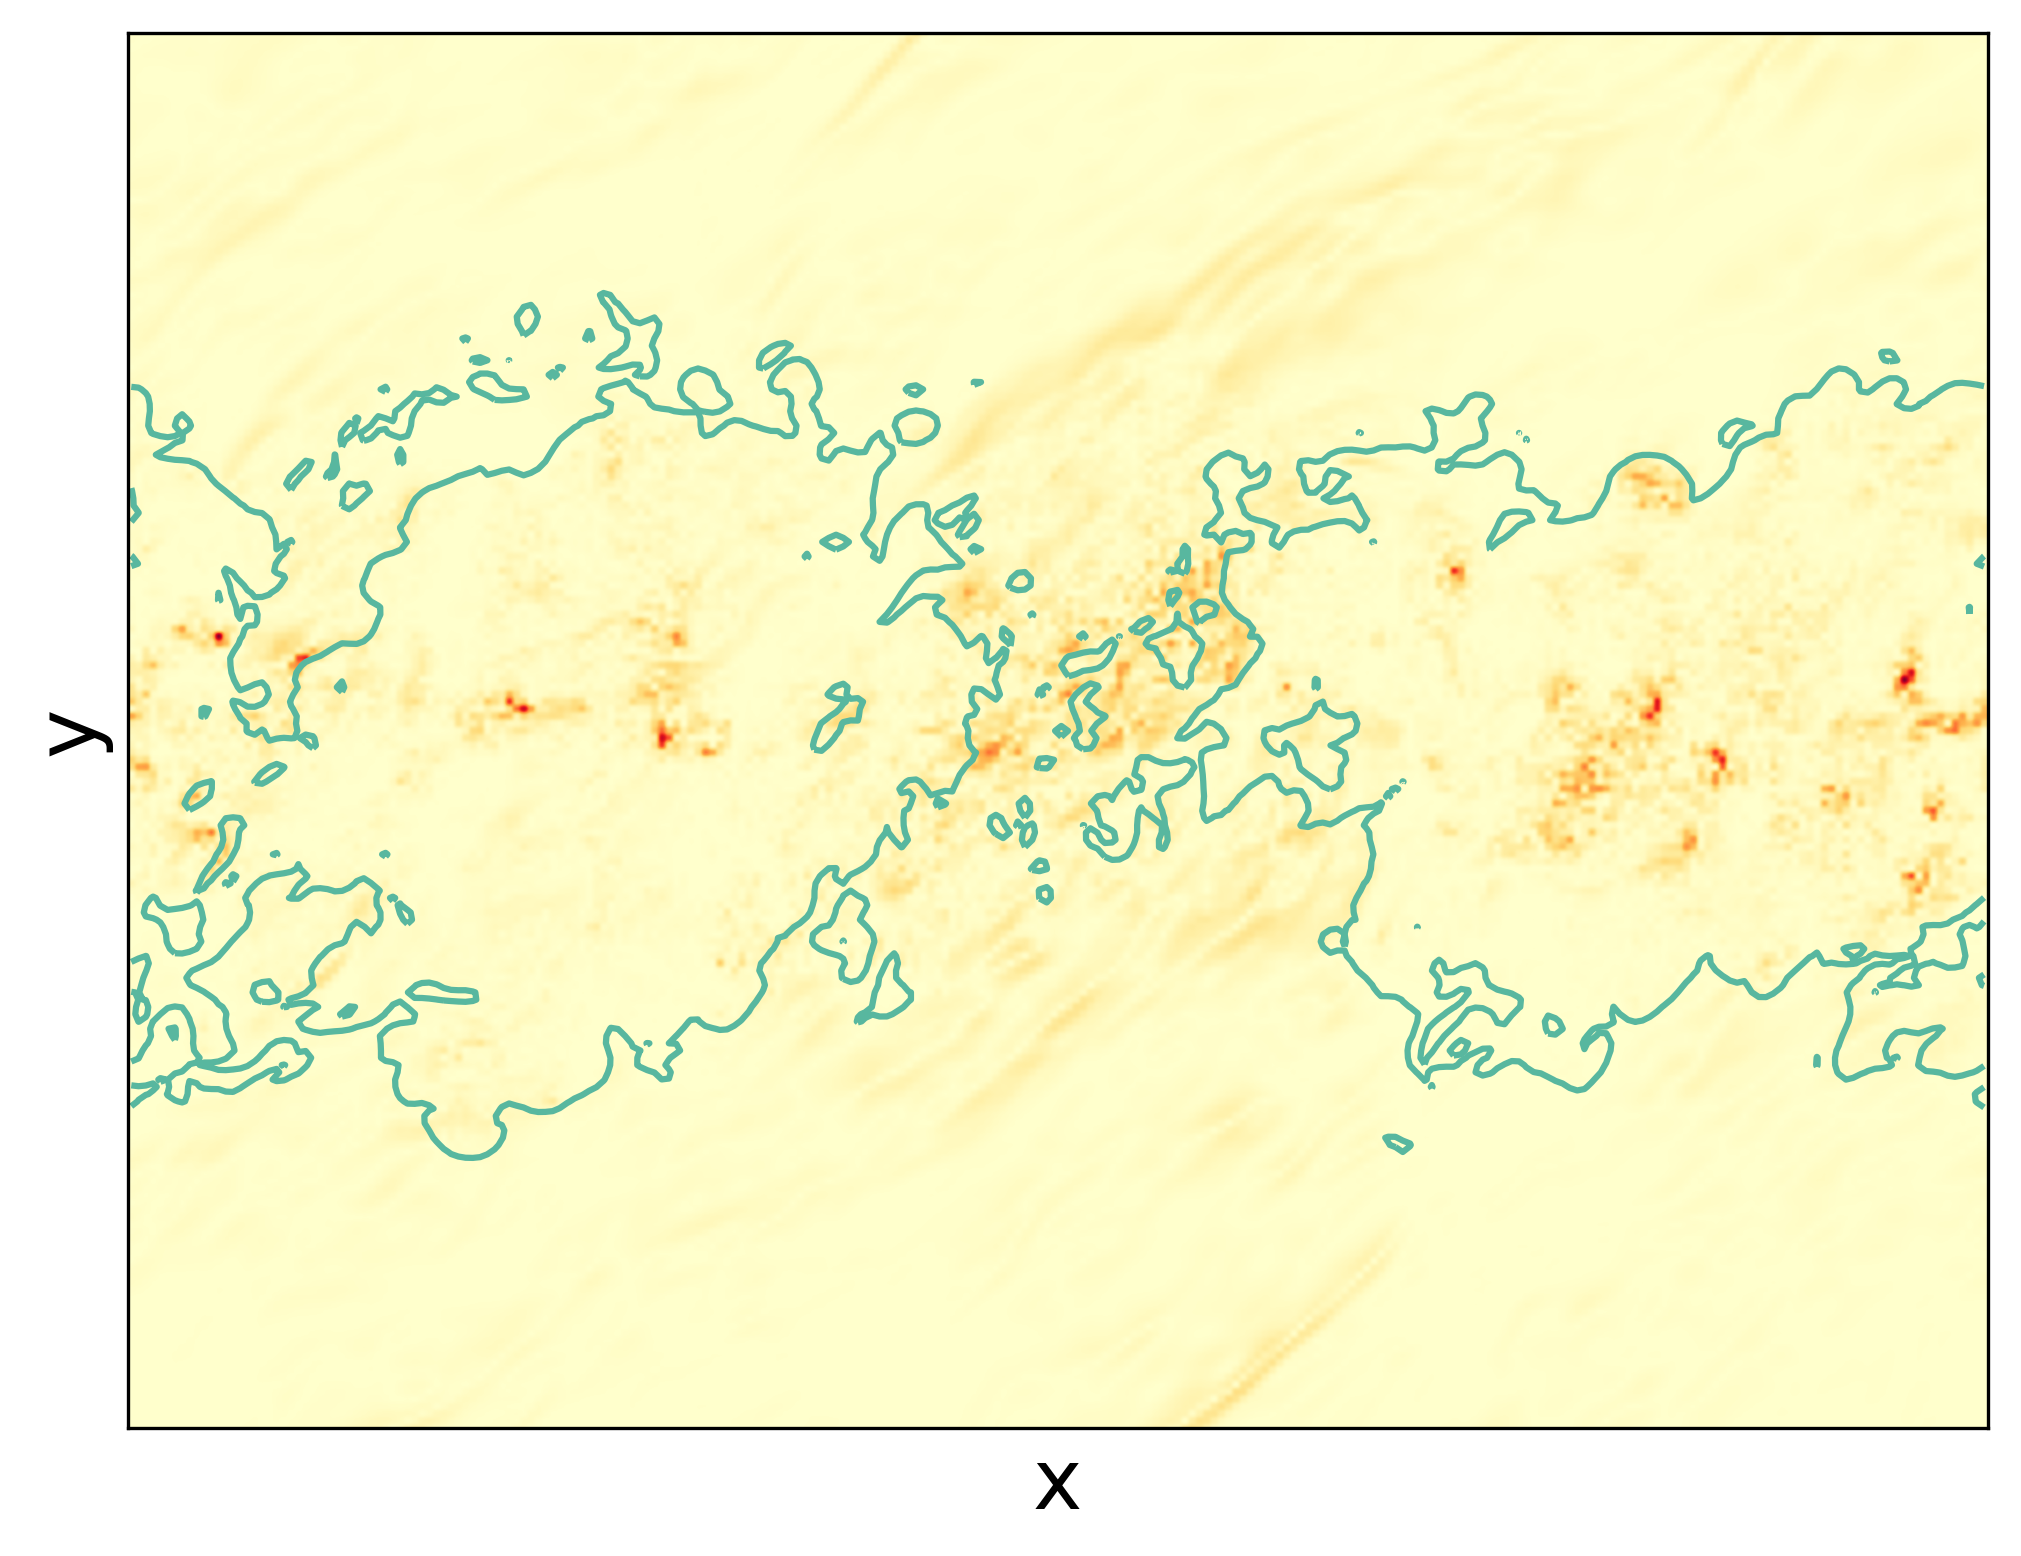

In [51]:
# Plot xy slice overlaid with dilatation contours
def plot_pdil_xy(step,zslice):
    fname = directory + "/shearlayer_%04d_dilatation.npy"%step
    data = np.load(fname)
    data = np.transpose(np.squeeze(data[:,:,zslice]))
    data = abs(data)
    print("Min and max values of pdil: {},{}".format(np.amax(data),np.amin(data)) )

    fact = 30
    fig = plt.figure(figsize=(Nx/fact,Ny/fact),dpi=300)
    im=plt.imshow(data,cmap='YlOrRd',interpolation='kaiser')
    #maxval = np.amax(data);
    #minval = np.amin(data);
    #cbar = plt.colorbar(im,ticks=[minval, maxval])
    #cbar.ax.set_yticklabels(['%0.2f'%(minval), '%0.2f'%(maxval)]) 
    #cbar.ax.tick_params(labelsize=0.75*fs)
    
def iso_cont_xy(reader,step,qname,level,savename=''):
    reader.step = step
    q = reader.readData(qname)
    data = np.squeeze(np.array(q))
    data = np.transpose(data)
    print("Time: {}".format(reader.time))

    plt.contour(data,levels=level,colors='#58b79f',linewidth=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('y',fontsize=20)
    plt.xlabel('x',fontsize=20)
    plt.ylim([Ny/4,3*Ny/4])
    plt.show()

    
zslice = Nz/10
step = 10
reader.sub_domain = (0,0,zslice), (reader.domain_size[0]-1, reader.domain_size[1]-1, zslice)

plot_pdil_xy(step,zslice)
iso_cont_xy(reader,step,'rho',0.92,savename='')


Min and max values of pdil: 0.000276157924235,2.72099022271e-10
Time: 600.0


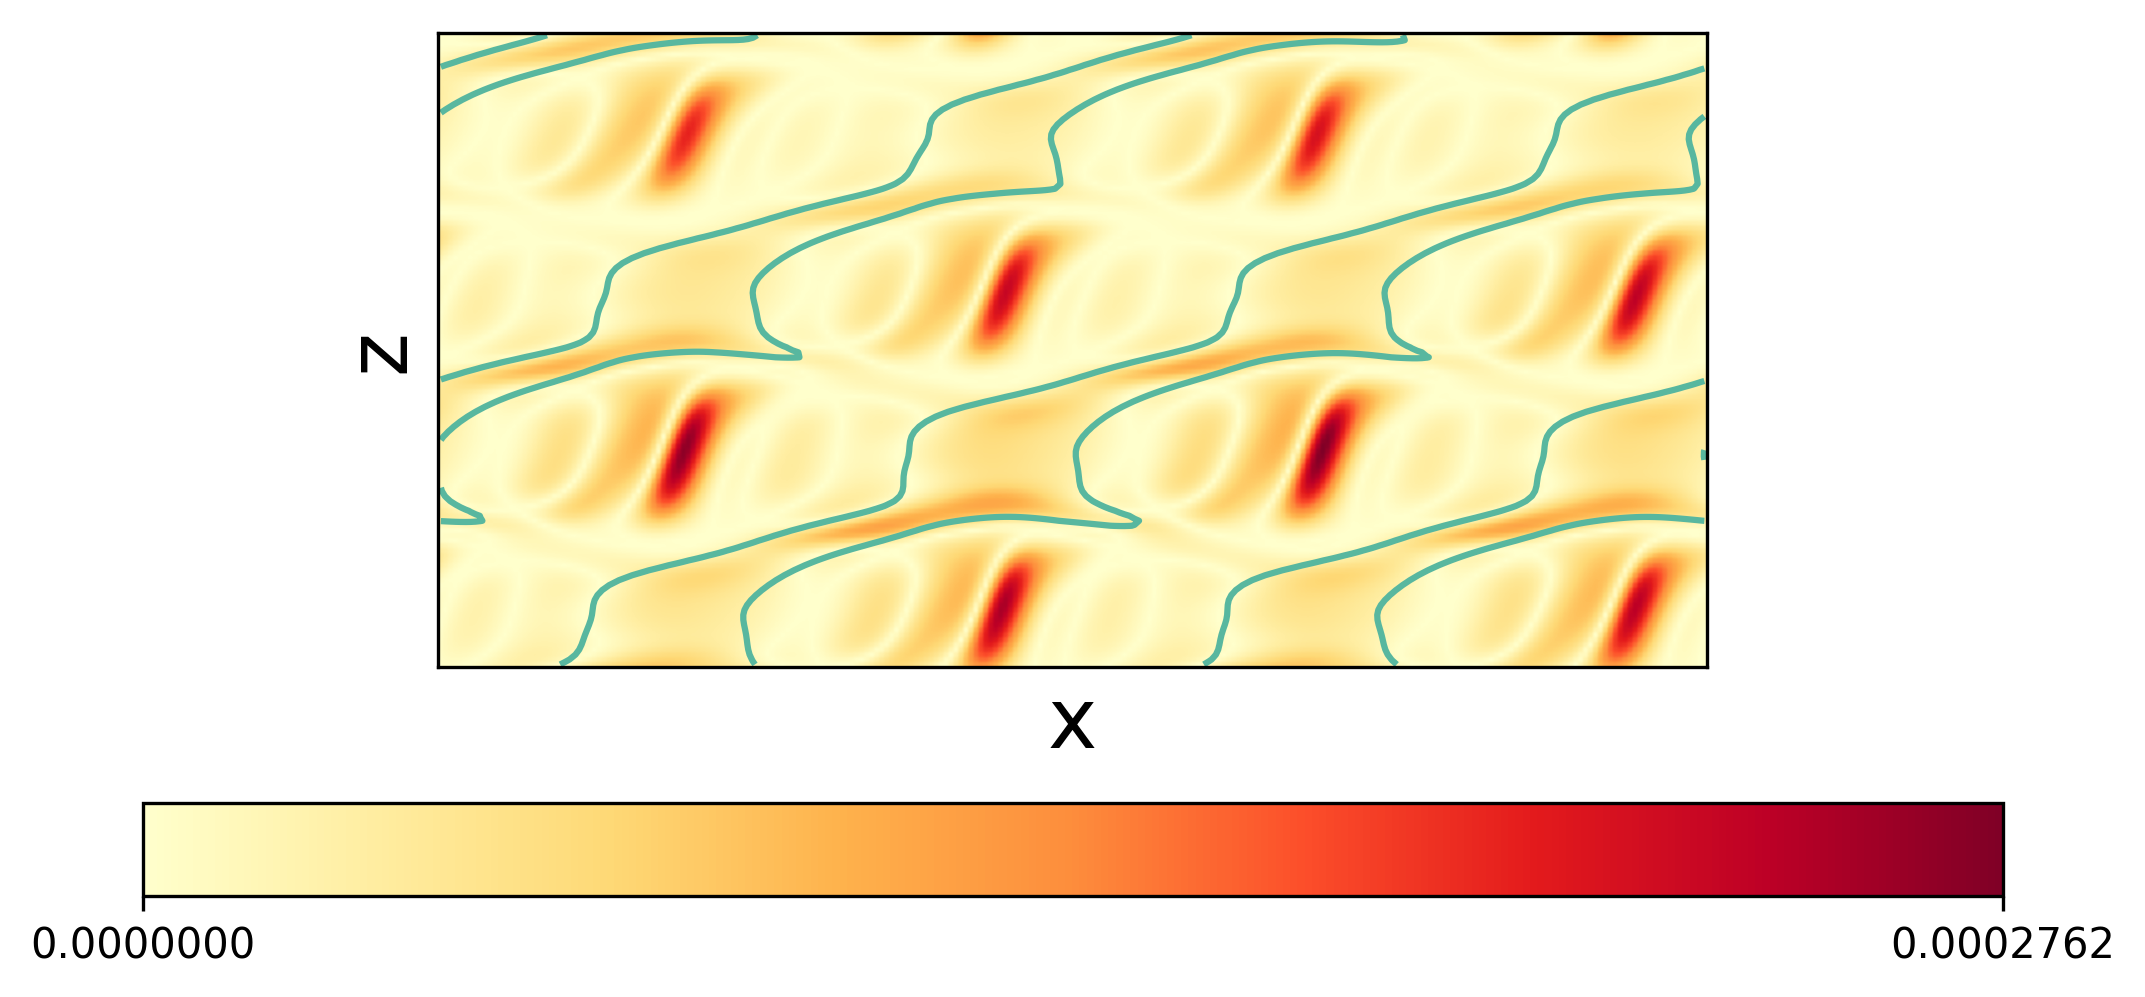

In [55]:
# Plot xy slice overlaid with dilatation contours
def plot_pdil_xz(step,yslice):
    fname = directory + "/shearlayer_%04d_dilatation.npy"%step
    data = np.load(fname)
    data = np.transpose(np.squeeze(data[:,yslice,:]))
    data = abs(data)
    print("Min and max values of pdil: {},{}".format(np.amax(data),np.amin(data)) )

    fact = 30
    fig = plt.figure(figsize=(Nx/fact,Nz/fact),dpi=300)
    im =plt.imshow(data,cmap='YlOrRd',interpolation='kaiser')
    maxval = np.amax(data);
    minval = np.amin(data);
    cbar = plt.colorbar(im,ticks=[minval, maxval],orientation='horizontal')
    #cbar.ax.set_yticklabels(['%0.2f'%(minval), '%0.2f'%(maxval)]) 
    #cbar.ax.tick_params(labelsize=0.75*fs)
    
def iso_cont_xz(reader,step,qname,level,savename=''):
    reader.step = step
    q = reader.readData(qname)
    data = np.squeeze(np.array(q))
    data = np.transpose(data)
    print("Time: {}".format(reader.time))

    plt.contour(data,levels=level,colors='#58b79f',linewidth=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('z',fontsize=20)
    plt.xlabel('x',fontsize=20)
    

    
yslice = int(Ny/2-2)
step = 6
reader.sub_domain = (0,yslice,0), (reader.domain_size[0]-1, yslice, reader.domain_size[2]-1)

plot_pdil_xz(step,yslice)
iso_cont_xz(reader,step,'rho',0.92,savename='')


(0.0015625000232830644, 0.0015625000232830644)


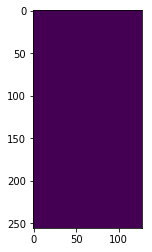

In [165]:
dat = reader.readData('Diffusivity_01')
dat = np.squeeze(np.array(dat))
print(np.amax(dat),np.amin(dat))
plt.imshow(dat)
